In [2]:
!gdown --id 1-5EJI4c44Ju7dSi77QPW6bV5O16hcwdW

C:\Users\jkwia\AppData\Local\Programs\Python\Python39\lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1-5EJI4c44Ju7dSi77QPW6bV5O16hcwdW
From (redirected): https://drive.google.com/uc?id=1-5EJI4c44Ju7dSi77QPW6bV5O16hcwdW&confirm=t&uuid=49f6d1ef-3294-4b34-83ed-812eadabe0d5
To: C:\Users\jkwia\OneDrive\Pulpit\Dysk\MGR EiTI\SEM_2\ASO\ASO-repo\ASO\stain_identification\archive.zip

  0%|          | 0.00/436M [00:00<?, ?B/s]
  0%|          | 524k/436M [00:00<03:27, 2.10MB/s]
  0%|          | 1.05M/436M [00:00<03:06, 2.32MB/s]
  0%|          | 1.57M/436M [00:00<03:05, 2.34MB/s]
  0%|          | 2.10M/436M [00:00<02:54, 2.49MB/s]
  1%|          | 2.62M/436M [00:01<02:40, 2.70MB/s]
  1%|          | 3.15M/436M [00:01<02:32, 2.83MB/s]
  1%|          | 3.67M/436M [00:01<02:27, 2.94MB/s]
  1%|  

In [6]:
!unzip archive.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
from skimage.io import imread_collection
defect_free = imread_collection('images/defect_free/*.jpg')
stain = imread_collection('images/stain/*.jpg')

In [18]:
image_size = {}
for i in defect_free:
  if i.shape not in image_size.keys():
    image_size[i.shape] = [0, 0]
  image_size[i.shape][0] += 1

for i in stain:
  if i.shape not in image_size.keys():
    image_size[i.shape] = [0, 0]
  image_size[i.shape][1] += 1

In [19]:
print("Liczba wszystkich zdjęć:", len(defect_free) + len(stain))
print("Liczba zdjęć tkanin bez defektów:", len(defect_free), "(", round(len(defect_free)*100/(len(defect_free) + len(stain)), 2), "\b% )")
print("Liczba zdjęć tkanin z plamami:", len(stain), "(", round(len(stain)*100/(len(defect_free) + len(stain)), 2), "\b% )")
print("--------------------------------------")
print("Liczba zdjęć danej rozdzielczości:")
for i in image_size.keys():
  print("Rozdzielczość:", i)
  print("\tLiczba wszystkich zdjęć:", image_size[i][0] + image_size[i][1], "(", round((image_size[i][0] + image_size[i][1])*100/(len(defect_free) + len(stain)), 2), "\b% wszystkich zdjęć )")
  print("\tLiczba zdjęć tkanin bez defektów:", image_size[i][0], "(", round(image_size[i][0]*100/len(defect_free), 2), "\b% wszystkich zdjęć tkanin bez defektów )")
  print("\tLiczba zdjęć tkanin z plamami:", image_size[i][1], "(", round(image_size[i][1]*100/len(stain), 2), "\b% wszystkich zdjęć tkanin z plamami )")

Liczba wszystkich zdjęć: 466
Liczba zdjęć tkanin bez defektów: 68 ( 14.59% )
Liczba zdjęć tkanin z plamami: 398 ( 85.41% )
--------------------------------------
Liczba zdjęć danej rozdzielczości:
Rozdzielczość: (1488, 1984)
	Liczba wszystkich zdjęć: 305 ( 65.45% wszystkich zdjęć )
	Liczba zdjęć tkanin bez defektów: 49 ( 72.06% wszystkich zdjęć tkanin bez defektów )
	Liczba zdjęć tkanin z plamami: 256 ( 64.32% wszystkich zdjęć tkanin z plamami )
Rozdzielczość: (1984, 1488)
	Liczba wszystkich zdjęć: 161 ( 34.55% wszystkich zdjęć )
	Liczba zdjęć tkanin bez defektów: 19 ( 27.94% wszystkich zdjęć tkanin bez defektów )
	Liczba zdjęć tkanin z plamami: 142 ( 35.68% wszystkich zdjęć tkanin z plamami )


Zdjęcia tkanin bez defektów


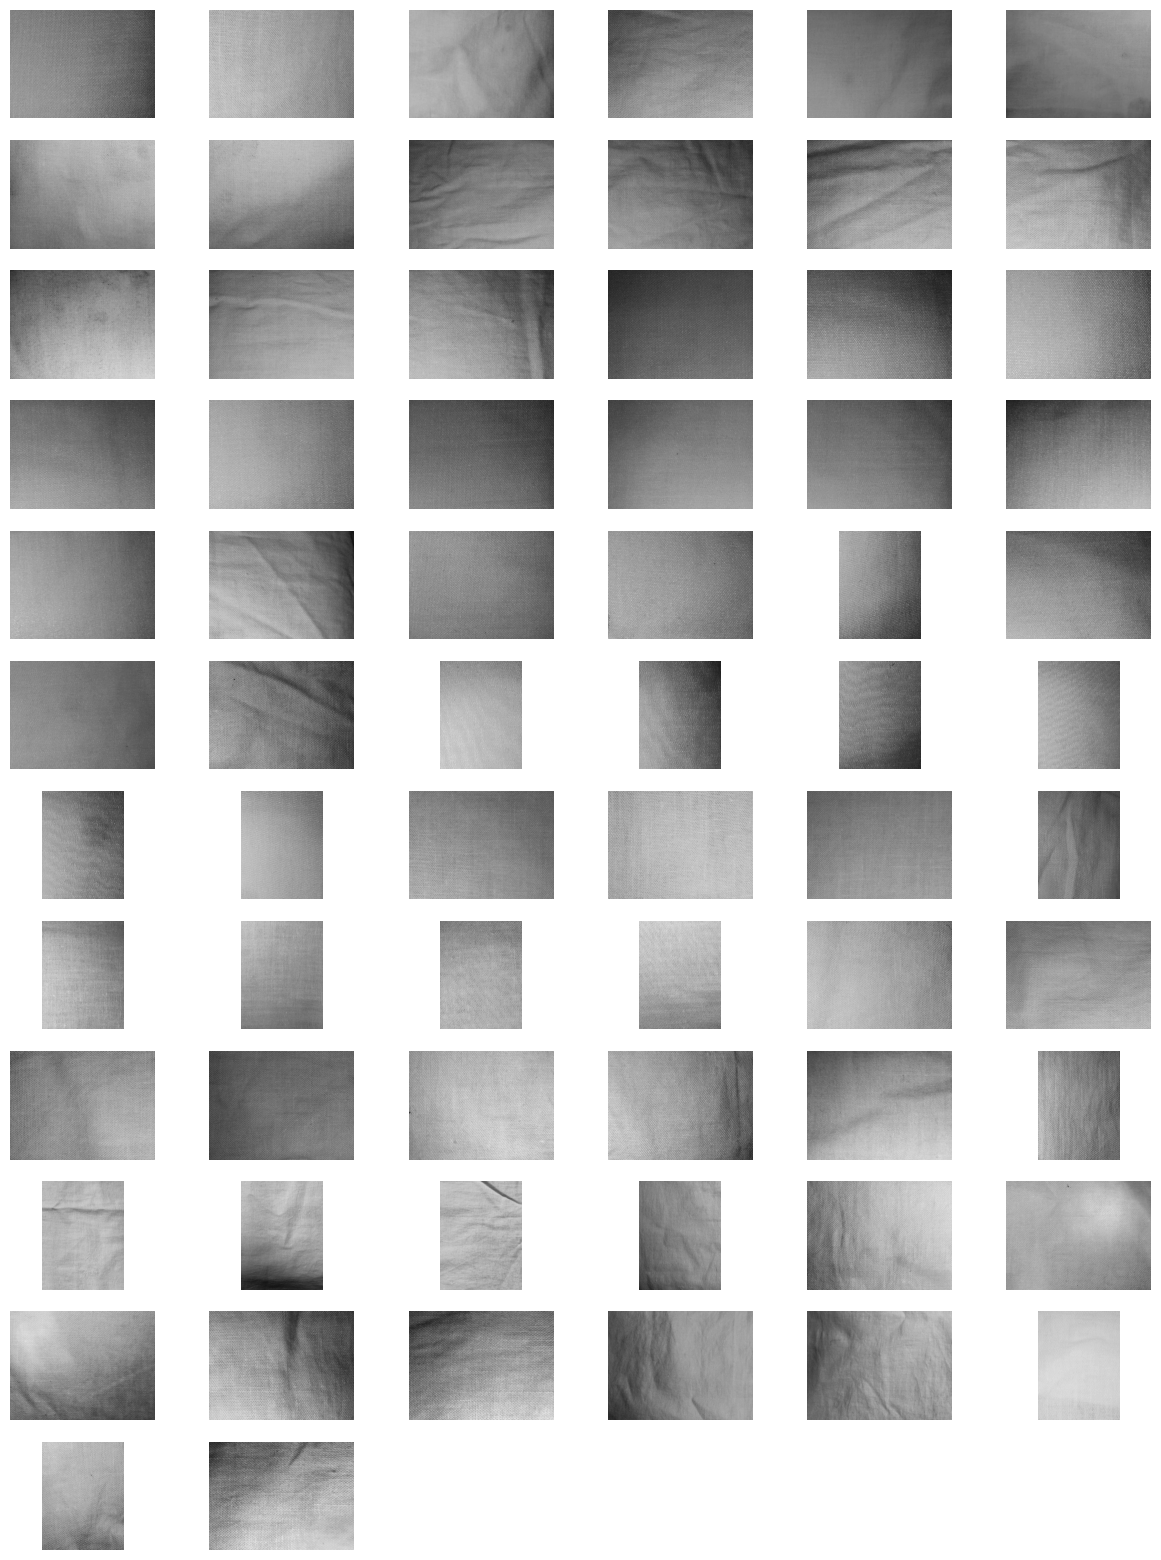

In [20]:
import matplotlib.pyplot as plt

print("Zdjęcia tkanin bez defektów")
fig = plt.figure(figsize=(15, 20))
for i in range(len(defect_free)):
  fig.add_subplot(round((len(defect_free)+1)/6), 6, i+1)
  plt.imshow(defect_free[i], cmap='gray')
  plt.axis('off')
plt.show()

Zdjęcia tkanin z plamami


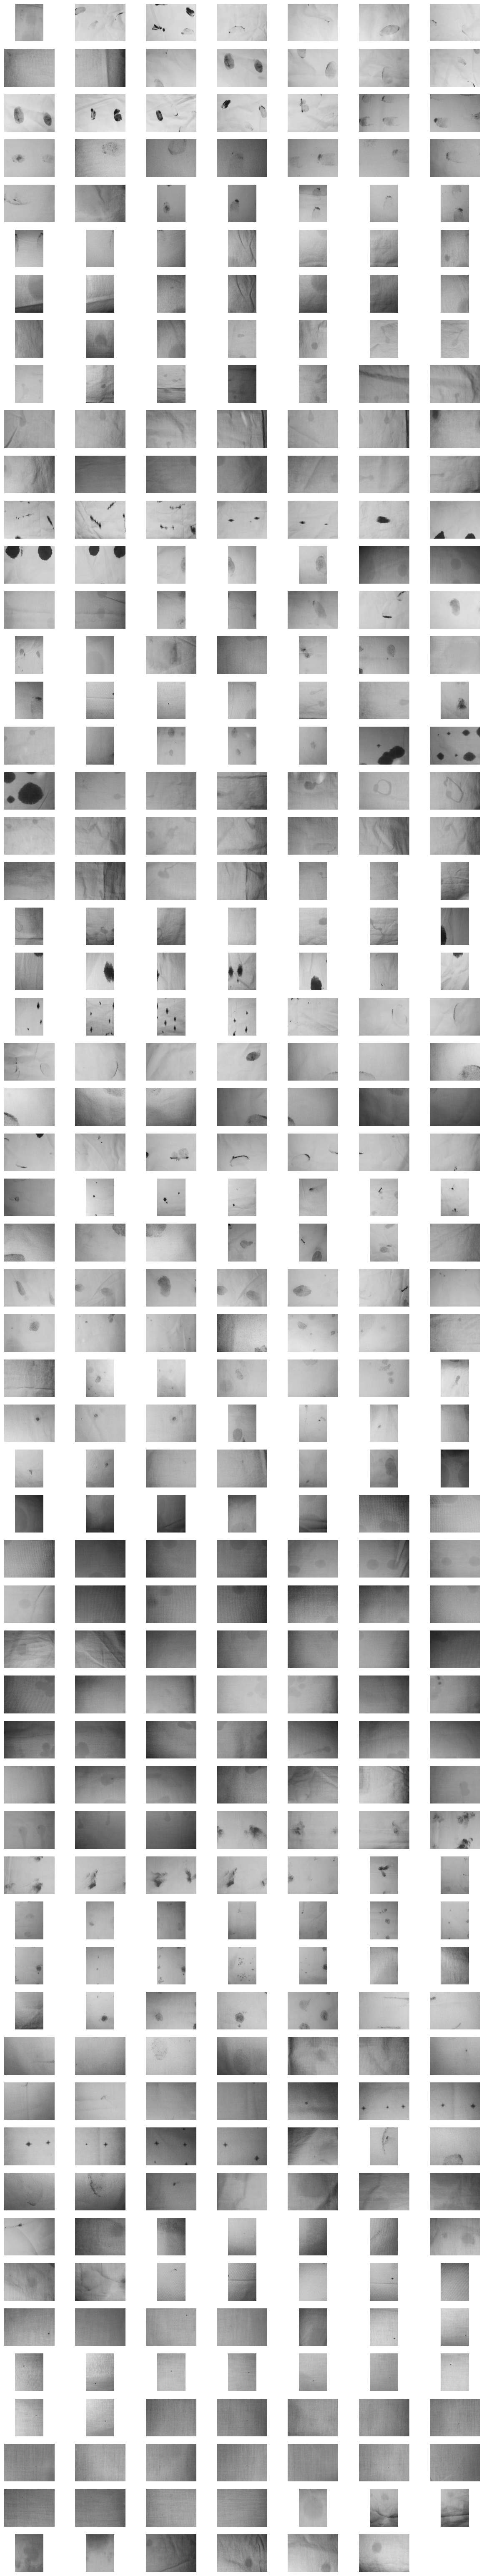

In [102]:
import matplotlib.pyplot as plt

print("Zdjęcia tkanin z plamami")
fig = plt.figure(figsize=(15, 80))
for i in range(len(stain)):
  fig.add_subplot(round((len(stain)+1)/7), 7, i+1)
  plt.imshow(stain[i], cmap='gray')
  plt.axis('off')
plt.show()

Histogram przykładowego zdjęcia tkanin bez defektów


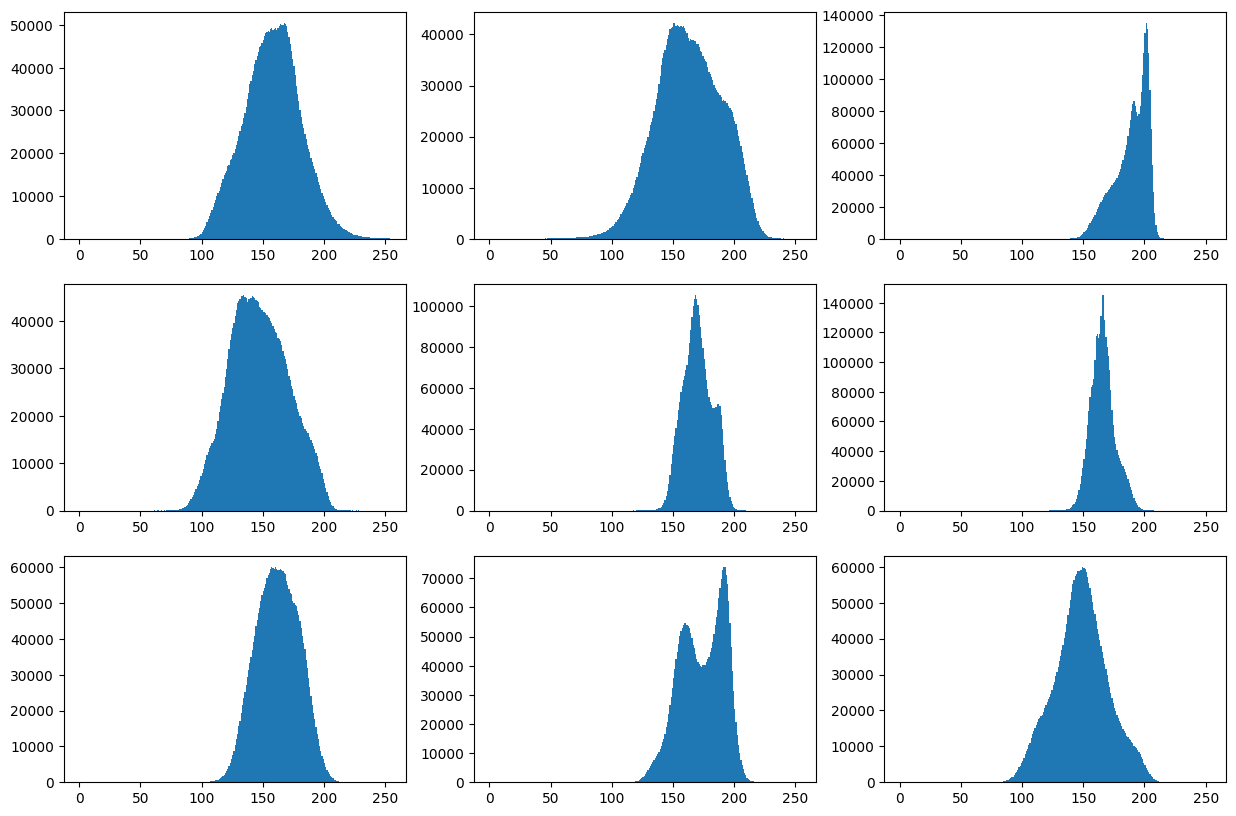

In [107]:
import matplotlib.pyplot as plt

print("Histogram przykładowego zdjęcia tkanin bez defektów")
fig = plt.figure(figsize=(15, 10))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  plt.hist(defect_free[i].reshape(-1), bins=range(0, 255))
plt.show()

Histogram przykładowego zdjęcia tkanin z plamami


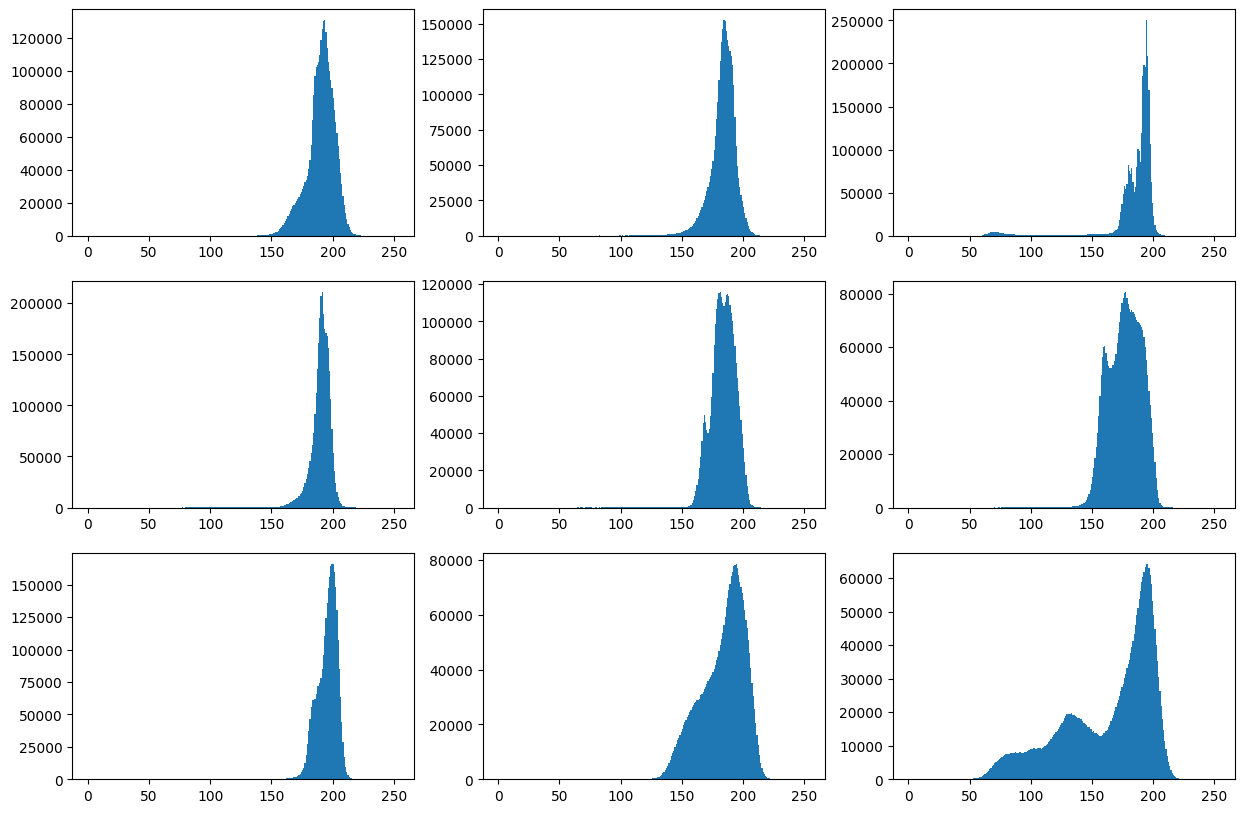

In [108]:
import matplotlib.pyplot as plt

print("Histogram przykładowego zdjęcia tkanin z plamami")
fig = plt.figure(figsize=(15, 10))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  plt.hist(stain[i].reshape(-1), bins=range(0, 255))
plt.show()